# 5. Exploratory Data Analysis (EDA) for Time Series

Before diving deep into time series modeling, it's essential to understand the underlying characteristics of the data. That's where Exploratory Data Analysis (EDA) plays a crucial role. For time series data, EDA helps in:

1. Understanding underlying patterns such as trends and seasonality.
2. Identifying outliers or any unusual data points.
3. Validating assumptions related to time series forecasting models.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample time series data
time = np.linspace(0, 2 * np.pi, 100)
trend = time * 0.5
seasonality = np.sin(time)
noise = np.random.normal(0, 0.5, 100)
timeseries = trend + seasonality + noise

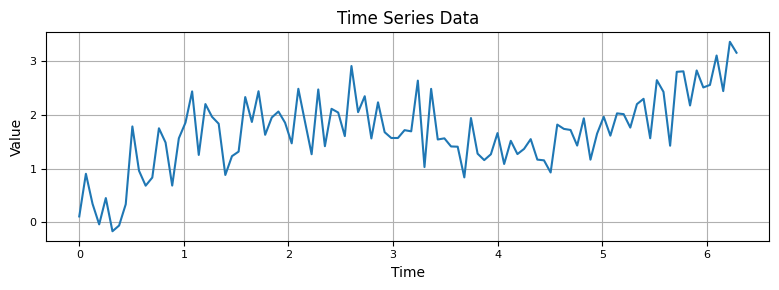

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))  # Adjust the figure size as per your preference
plt.plot(time, timeseries)
plt.xlabel('Time', fontsize=10)  # Adjust x-axis label font size
plt.ylabel('Value', fontsize=10)  # Adjust y-axis label font size
plt.title('Time Series Data', fontsize=12)  # Adjust title font size

# Adjust tick label font size for both x and y axes
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(True)
plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()


## 5.1 Visualizing Time Series Data

The simplest and often the most informative EDA technique is visualization.

- **Line Plots**: This is the most common technique, where time is on the x-axis, and the metric is on the y-axis.

## 5.2 Identifying Trends and Seasonality

Once visualized, you can easily spot:

- **Trend**: Long-term movement in data.
- **Seasonality**: Repeating patterns or cycles.
- **Residual (or Noise)**: Random variations left after extracting trend and seasonality.

For instance, monthly sales of a store might have an upward trend and a noticeable pattern that repeats every year (e.g., spikes during Black Friday or Christmas).

To identify and separate these components explicitly, you can use decomposition methods:

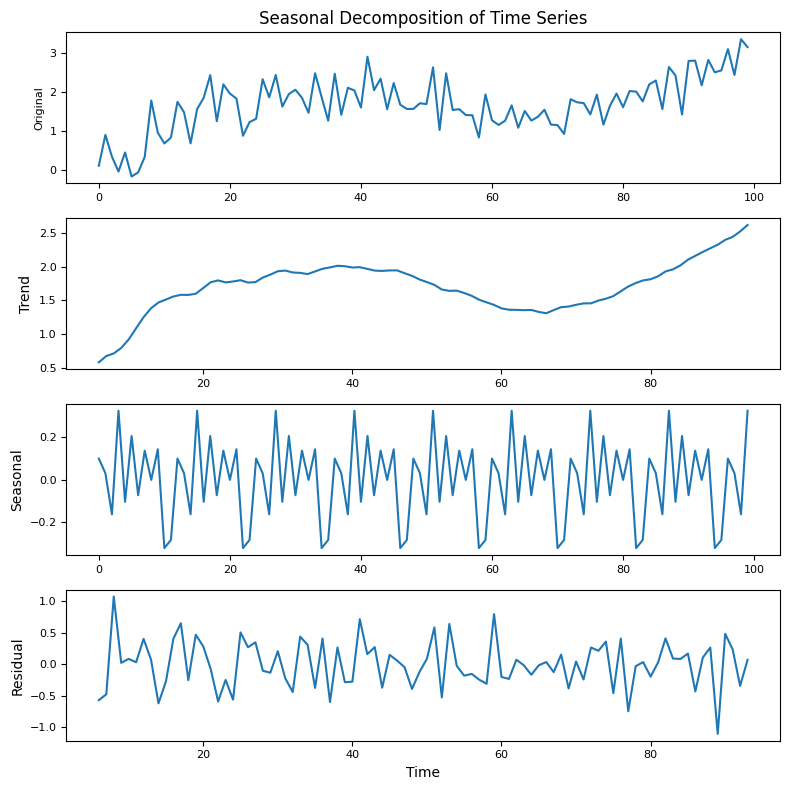

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(timeseries, model='additive', period=12)

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 8))  # Adjust the figure size as per your preference

# Plot the original time series
ax1.plot(timeseries)
ax1.set_ylabel('Original', fontsize=8)  # Adjust y-axis label font size
ax1.set_title('Seasonal Decomposition of Time Series', fontsize=12)  # Adjust title font size

# Plot the trend component
ax2.plot(result.trend)
ax2.set_ylabel('Trend', fontsize=10)  # Adjust y-axis label font size

# Plot the seasonal component
ax3.plot(result.seasonal)
ax3.set_ylabel('Seasonal', fontsize=10)  # Adjust y-axis label font size

# Plot the residual component
ax4.plot(result.resid)
ax4.set_xlabel('Time', fontsize=10)  # Adjust x-axis label font size
ax4.set_ylabel('Residual', fontsize=10)  # Adjust y-axis label font size

# Adjust tick label font size for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', labelsize=8)

plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()


### 5.2.1 Additive and Multiplicative Decomposition

Depending on the nature of the trend and seasonality, decomposition can be:

- **Additive**: When the magnitude of seasonality doesn't change as the time series value changes. Mathematically, it's expressed as:
    \[ Y_t = Trend + Seasonal + Residual \]

- **Multiplicative**: When the magnitude of seasonality increases or decreases as the time series value increases or decreases. Mathematically:
    \[ Y_t = Trend \times Seasonal \times Residual \]

**Example Code for Additive and Multiplicative Decomposition**:


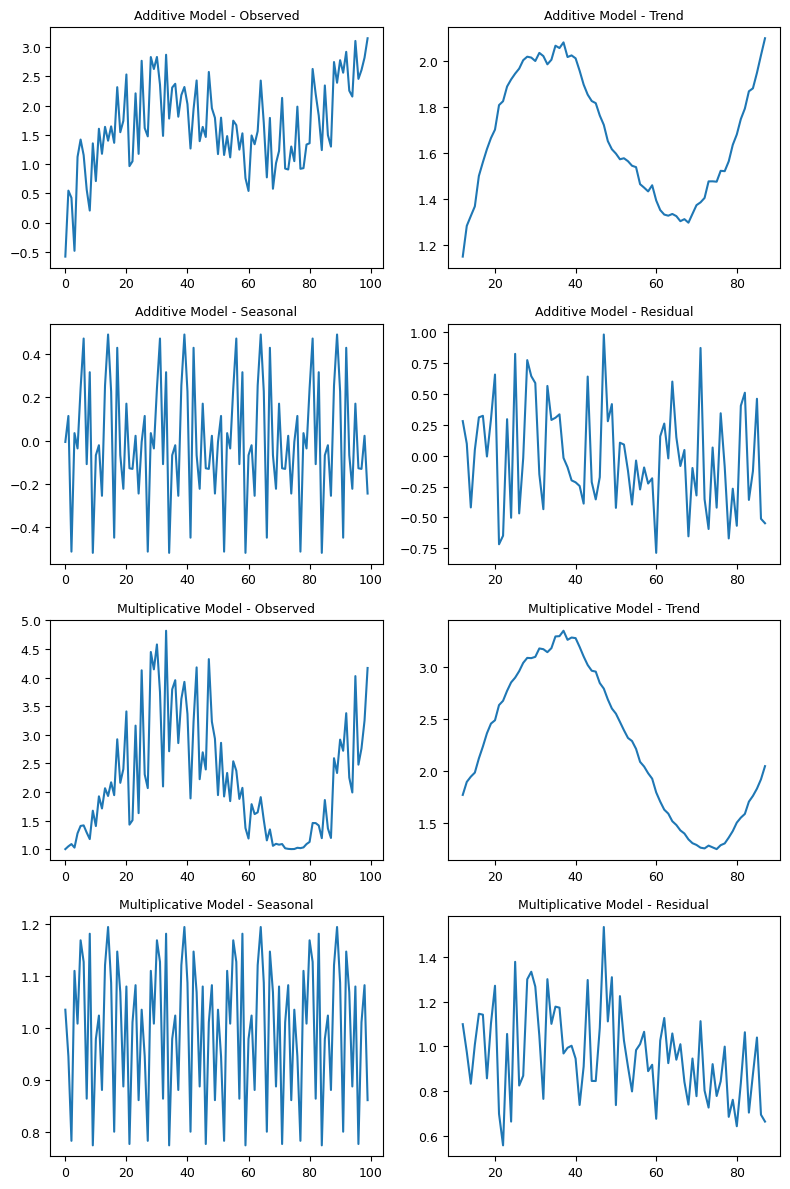

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample Data
time = np.linspace(0, 2 * np.pi, 100)
trend = time * 0.5
seasonality = np.sin(time)
noise = np.random.normal(0, 0.5, 100)

# Additive Model
additive_series = trend + seasonality + noise
result_add = seasonal_decompose(additive_series, model='additive', period=25)

# Multiplicative Model
multiplicative_series = trend * (1 + seasonality) * (1 + noise)

# Making sure the series is positive
min_val = np.min(multiplicative_series)
if min_val <= 0:
    multiplicative_series -= min_val - 1  # Subtract the absolute minimum value and subtract an extra 1 for safety.

result_mul = seasonal_decompose(multiplicative_series, model='multiplicative', period=25)

# Create a figure with subplots for both models
fig, axes = plt.subplots(4, 2, figsize=(8, 12))  # Adjusted rows to 4

# Plot the additive model decomposition
axes[0, 0].plot(result_add.observed)
axes[0, 0].set_title('Additive Model - Observed', fontsize=9)  # Adjust title font size

axes[0, 1].plot(result_add.trend)
axes[0, 1].set_title('Additive Model - Trend', fontsize=9)

axes[1, 0].plot(result_add.seasonal)
axes[1, 0].set_title('Additive Model - Seasonal', fontsize=9)

axes[1, 1].plot(result_add.resid)
axes[1, 1].set_title('Additive Model - Residual', fontsize=9)



# Plot the multiplicative model decomposition
axes[2, 0].plot(result_mul.observed)
axes[2, 0].set_title('Multiplicative Model - Observed', fontsize=9)

axes[2, 1].plot(result_mul.trend)
axes[2, 1].set_title('Multiplicative Model - Trend', fontsize=9)

axes[3, 0].plot(result_mul.seasonal)
axes[3, 0].set_title('Multiplicative Model - Seasonal', fontsize=9)

axes[3, 1].plot(result_mul.resid)
axes[3, 1].set_title('Multiplicative Model - Residual', fontsize=9)

# Adjust tick label font size for all subplots
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=9)

plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()



### 5.2.2. Moving Averages(Smoothing)

 Classical decomposition using moving averages involves smoothing the series to identify the trend. The seasonality is then identified by taking the average value for each season, and the residual is what's left after removing trend and seasonality.

- **Centered Moving Average**: Used for even periods, it averages data symmetrically around a central point.
- **Trailing Moving Average**: Used for odd periods, it takes average up to the data point.

**Example for Decomposition using Moving Averages**:

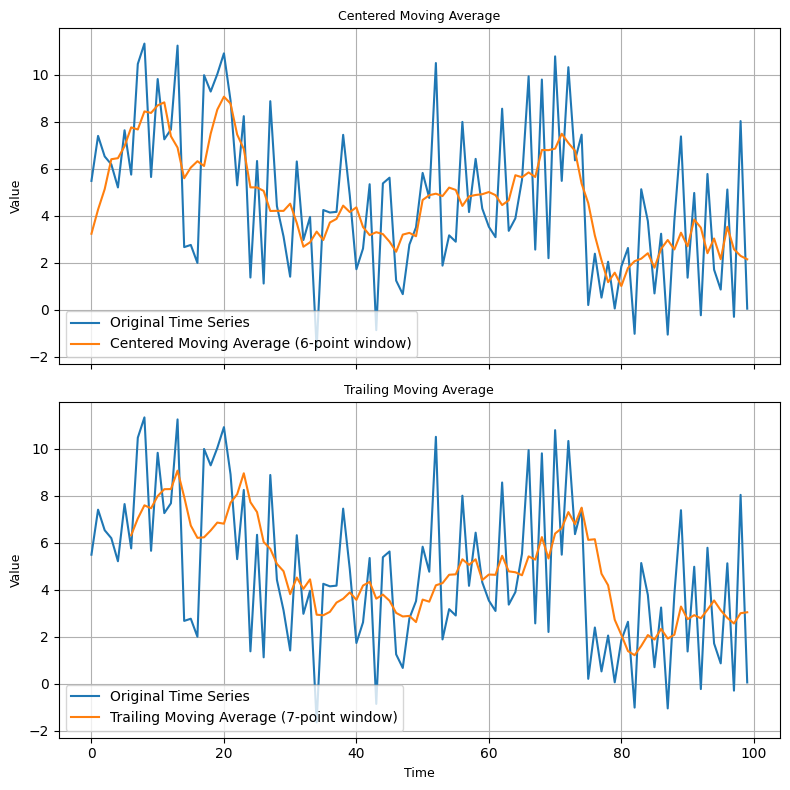

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample time series dataset
np.random.seed(0)
n = 100
time_series = np.random.rand(n) * 10 + np.sin(np.linspace(0, 4 * np.pi, n)) * 2

# Define the window size for moving averages
centered_window_size = 6  # Even period
trailing_window_size = 7  # Odd period

# Calculate the centered moving average
centered_ma = np.convolve(time_series, np.ones(centered_window_size)/centered_window_size, mode='same')

# Calculate the trailing moving average
trailing_ma = np.convolve(time_series, np.ones(trailing_window_size)/trailing_window_size, mode='valid')

# Calculate the residual (difference between original and centered moving average)
residual = time_series - centered_ma

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Plot the original time series and centered moving average
ax1.plot(time_series, label="Original Time Series")
ax1.plot(centered_ma, label=f"Centered Moving Average ({centered_window_size}-point window)")
ax1.set_title("Centered Moving Average", fontsize=9)  # Adjust title font size
ax1.set_ylabel("Value", fontsize=9)  # Adjust y-axis label font size
ax1.legend()
ax1.grid(True)

# Plot the original time series and trailing moving average
ax2.plot(time_series, label="Original Time Series")
ax2.plot(np.arange(trailing_window_size-1, n), trailing_ma, label=f"Trailing Moving Average ({trailing_window_size}-point window)")
ax2.set_title("Trailing Moving Average", fontsize=9)  # Adjust title font size
ax2.set_xlabel("Time", fontsize=9)  # Adjust x-axis label font size
ax2.set_ylabel("Value", fontsize=9)  # Adjust y-axis label font size
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


### 5.2.3. STL Decomposition (Seasonal-Trend decomposition using LOESS)
 STL stands for Seasonal-Trend decomposition using LOESS (locally estimated scatterplot smoothing). It's a more flexible method than classical decomposition, allowing for changing seasonality patterns over time and robust to outliers.

  **Example for STL Decomposition**:

In [ ]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data.iloc[:, 0]

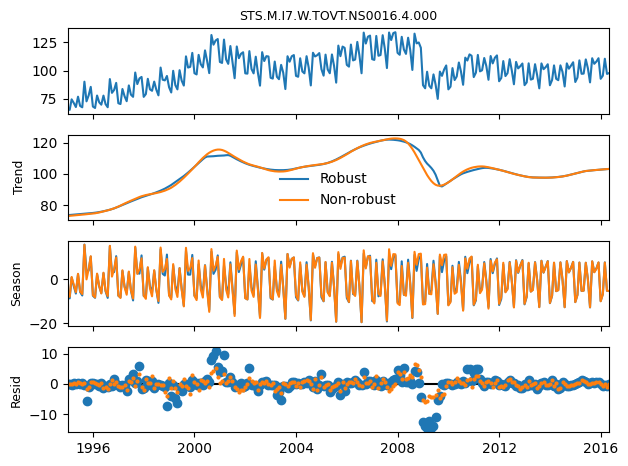

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none", markersize=2)
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)



stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

# Reduce font size for titles and labels
for ax in fig.get_axes():
    ax.set_title(ax.get_title(), fontsize=9)
    ax.set_xlabel(ax.get_xlabel(), fontsize=9)
    ax.set_ylabel(ax.get_ylabel(), fontsize=9)

res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

plt.show()


Conclusion:

Time series decomposition provides a structured way to analyze and visualize the underlying components of a series. Choosing between additive and multiplicative or between classical and STL decomposition largely depends on the nature of the data and the specific characteristics you aim to capture.





## 5.3 ACF and PACF plots

These are crucial plots when it comes to understanding the auto-correlation characteristics of a time series:

- **ACF (Auto-Correlation Function)**: It gives us the correlation of the series with its lagged values. It's helpful to determine the order of the moving average (MA) component in an ARIMA model.

- **PACF (Partial Auto-Correlation Function)**: It gives the correlation which is not explained by the previous lags. Helps determine the order of the autoregressive (AR) component in an ARIMA model.

Here's how you generate them:





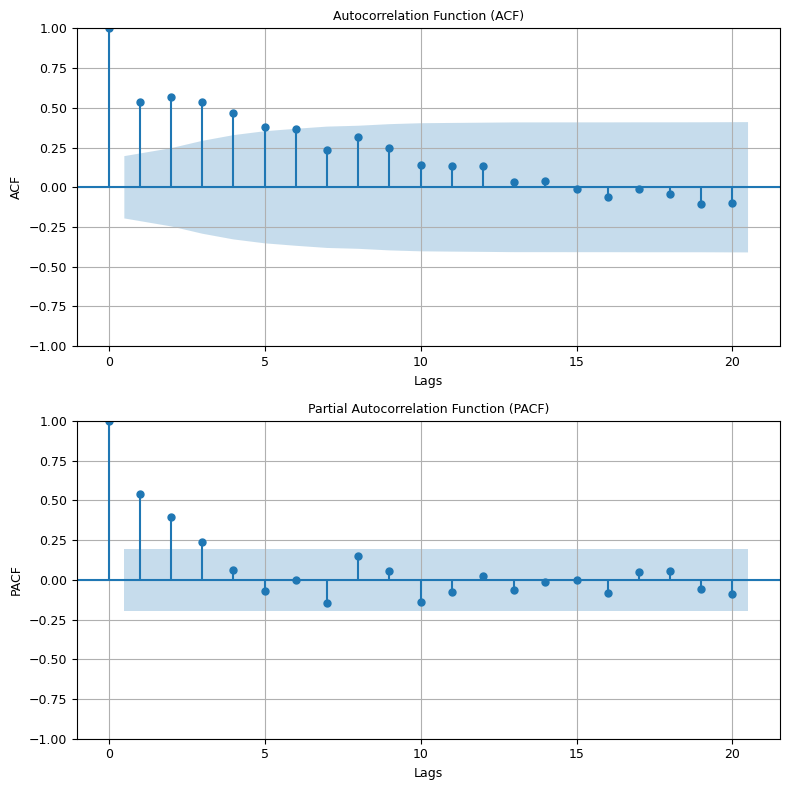

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create a figure with subplots for autocorrelation and partial autocorrelation plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # Adjust the figure size as per your preference

# Plot the autocorrelation function (ACF)
plot_acf(timeseries, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=9)  # Adjust title font size
ax1.set_xlabel('Lags', fontsize=9)  # Adjust x-axis label font size
ax1.set_ylabel('ACF', fontsize=9)  # Adjust y-axis label font size
ax1.grid(True)  # Add grid

# Plot the partial autocorrelation function (PACF)
plot_pacf(timeseries, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=9)  # Adjust title font size
ax2.set_xlabel('Lags', fontsize=9)  # Adjust x-axis label font size
ax2.set_ylabel('PACF', fontsize=9)  # Adjust y-axis label font size
ax2.grid(True)  # Add grid

# Adjust tick label font size for both subplots
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=9)

plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()


Understanding ACF and PACF:
- A slow decay in ACF suggests a moving average component.
- A sharp drop in PACF after a certain lag `k` suggests that an autoregressive term up to `k` is significant.

Conclusion:

Exploratory Data Analysis (EDA) is an essential first step in time series analysis, just as in any other data analysis task. Visualization helps to get a feel for the time series data. Decomposition helps in understanding its components, and ACF & PACF plots assist in understanding the correlation characteristics, which are vital for models like ARIMA.